In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#TODO: Find a better way to parse csv files with pandas
list_of_animals = []

observations_df = pd.read_csv('observations.csv', keep_default_na=False, na_values=[""])
info_df = pd.read_csv('species_info.csv', keep_default_na=False, na_values=[""])

for col in info_df:
    print(info_df[col].unique())

inner_merge_df = pd.merge(left=observations_df, right=info_df, left_on='scientific_name', right_on='scientific_name')
inner_merge_df

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']
["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'Thicket Creeper, Virginia Creeper, Woodbine'
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,NaN
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant,"Green Panic-Grass, Panic Grass",NaN
25629,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant,"Green Panic-Grass, Panic Grass",NaN
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant,"Green Panic-Grass, Panic Grass",NaN


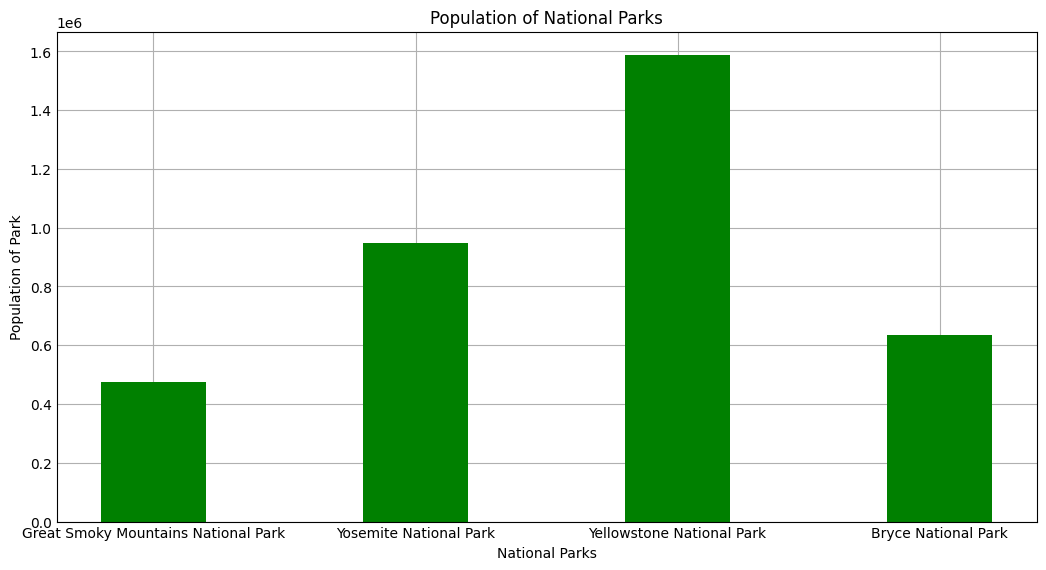

In [10]:
# Populations of parks
park_pops = {'Great Smoky Mountains National Park':0, 'Yosemite National Park':0, 'Yellowstone National Park':0, 'Bryce National Park':0}

for index, row in inner_merge_df.iterrows():
    park_pops[row[1]] += row[2]

#for creating bar graph
plt.style.use('_mpl-gallery')
x = park_pops.keys()
y = park_pops.values()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x, y, color ='green',width = 0.4)

plt.xlabel("National Parks")
plt.ylabel("Population of Park")
plt.title("Population of National Parks")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

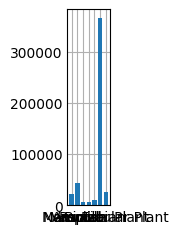

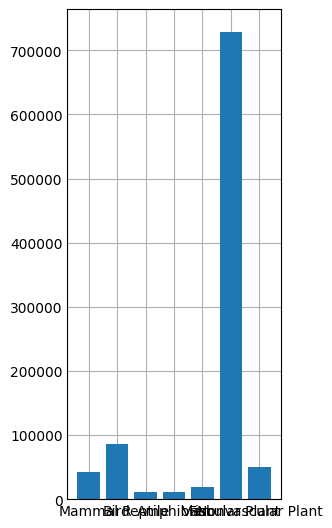

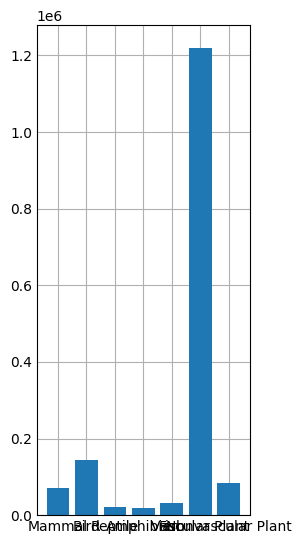

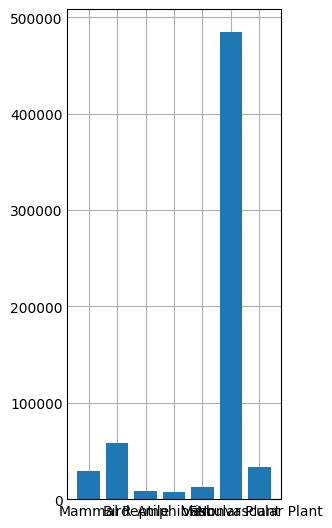

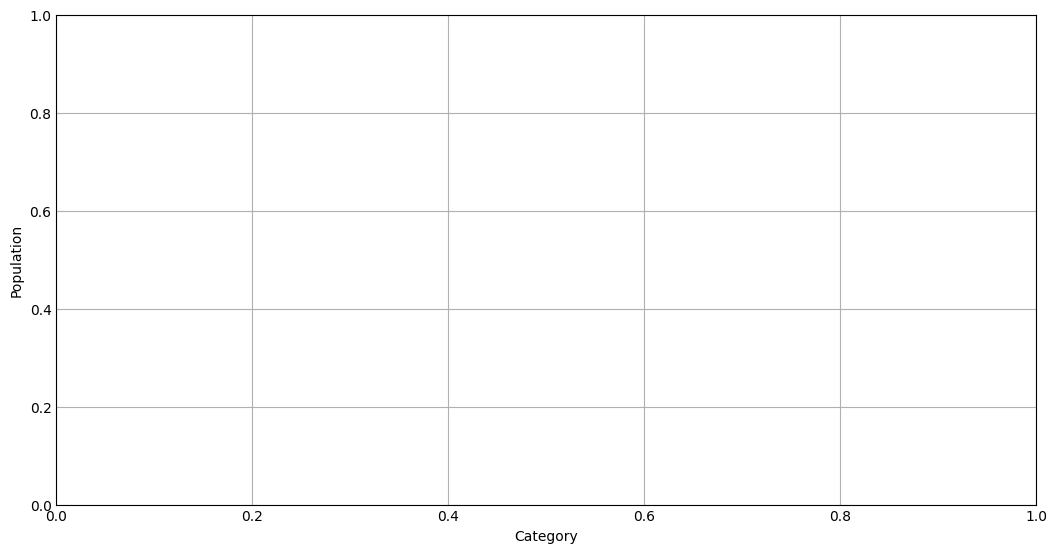

In [20]:
park_pop_categories = {'Great Smoky Mountains National Park':{'Mammal':0 ,'Bird':0, 'Reptile':0, 
                                                              'Amphibian':0, 'Fish':0, 'Vascular Plant':0,'Nonvascular Plant':0}, 

                       'Yosemite National Park':{'Mammal':0 ,'Bird':0, 'Reptile':0, 
                                                 'Amphibian':0, 'Fish':0, 'Vascular Plant':0,'Nonvascular Plant':0}, 

                       'Yellowstone National Park':{'Mammal':0 ,'Bird':0, 'Reptile':0, 
                                                    'Amphibian':0, 'Fish':0, 'Vascular Plant':0,'Nonvascular Plant':0},

                       'Bryce National Park':{'Mammal':0 ,'Bird':0, 'Reptile':0, 
                                              'Amphibian':0, 'Fish':0, 'Vascular Plant':0,'Nonvascular Plant':0}}

for index, row in inner_merge_df.iterrows():
    park_pop_categories[row[1]][row[3]] += row[2]


counter = 1
for out_key, out_value in park_pop_categories.items():
    plt.subplot(1, 4, counter)
    plt.bar(out_value.keys(), out_value.values())
    plt.figure(figsize= (10, 5))
    counter += 1


plt.xlabel('Category')
plt.ylabel('Population')
plt.show()



In [24]:
# 3) Per park, populations of each category